In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
WWCases = [71329,
73332,
75184,
75700,
76677,
77673,
78651,
79205,
80087,
80828,
81820,
83112,
84615,
86604,
88585,
90447,
93018,
95324,
98418,
102059,
106117,
110013,
114448,
118950,
126335,
134594,
145527,
156512,
169543,
182470,
198246,
218983,
245162,
275874,
305366,
337843,
379469,
423363,
472100,
533205,
598060,
664940,
725584,
790012,
864229,
941687,
1022140,
1106573,
1188365,
1259285,
1332572,
1411180,
1496019,
1581505,
1673711,
1753367,
1825079,
1895521,
1968891,
2051944,
2132952,
2218208,
2298862,
2374486,
2448176,
2523812,
2604070,
2689021,
2791121,
2881533,
2955078,
3024621,
3100170,
3180137,
3266132,
3361305,
3444192,
3526536,
3606039,
3687506,
3783479,
3879928,
3976563,
4065924,
4145975,
4220794,
4306378,
4395823,
4492780,
4593072,
4689879,
4772122,
4862217,
4957412,
5060164,
5167906,
5275936,
5375871,
5472605,
5562645,
5655465,
5762281,
5879114,
6005239,
6129572,
6238550,
6617802,
6736058,
6859082,
6992718,
7126258,
7257590,
7374586,
7485484,
7609573,
7748466,
7889589,
8035208,
8173282,
8300894,
8430357,
8577562,
8726953,
8871096,
9056467,
9217330,
9351159,
9494260,
9661824,
9839819,
10024420,
10223242,
10404533,
10572497,
10738844,
10918073,
11120528,
11333933,
11552076,
11751387,
11933264,
12108940,
12321605,
12539778,
12767980,
13009868,
13230633,
13432946,
13633293,
13857428,
14097302,
14350554,
14595115,
14825410,
15051276,
15260361,
15504301,
15788656,
16068559,
16361478,
16626704,
16854665,
17076889,
17329749,
17622884,
17914172,
18209265,
18472691,
18699843,
18904097,
19161795,
19438714,
19726736,
20013861,
20288532,
20517912,
20739860,
21011544,
21305040,
21595721,
21889773,
22158499,
22380208,
22586817,
22849685,
23129597,
23405932,
23673124,
23946189,
24162232,
24384099,
24643555,
24926686,
25209480,
25504965,
25773366,
26004875,
26258568,
26525225,
26817135,
27111482,
27422782,
27705546,
27950475,
28158800,
28411383,
28705011,
29012889,
29334968,
29630264,
29888672,
30142601,
30427717,
30741202,
31059466,
31389646,
31694357,
31956681,
32198098,
32479221,
32800571,
33120289,
33450707,
33759263,
34024432,
34265664,
34559273,
34879697,
35207944,
35540371,
35849935,
36111017,
36386282,
36700919,
37053809,
37413960,
37780980,
38158801,
38453223,
38732765,
39053615,
39442324,
39848352,
40270201,
40668086,
41020830,
41370910,
41762868,
42208669,
42696895,
43191922,
43671808,
44107253,
44525776,
44992175,
45509768,
46060544,
46637997,
47141219,
47612717,
48092012,
48587330,
49161667,
49786962,
50420168,
51052265,
51559047,
52053822,
52615011,
53241003,
53894150,
54563751,
55169316,
55690881,
56204211,
56768915,
57396056,
58056192,
58730300,
59339701,
59868963,
60411534,
60976824,
61620732,
62244183,
62866804,
63459400,
63980944,
64483411,
65069046,
65713867,
66404766,
67101621,
67745989,
68300786,
68836230,
69442210,
70106335,
70806715,
71521139,
72177225,
72732968,
73268739,
73866073,
74592246,
75328680,
76051232,
76686134,
77250225,
77792735,
78407111,
79105044,
79802137,
80337893,
80808173,
81246281,
81745709,
82372405,
83109813,
83870461,
84502555,
85073100,
85601487,
86156287,
86857559,
87665196,
88499238,
89332844,
90086156,
90718311
]

WWDeaths = [1775,
1873,
2009,
2126,
2247,
2360,
2460,
2618,
2699,
2763,
2800,
2858,
2923,
2977,
3050,
3117,
3202,
3285,
3387,
3493,
3598,
3826,
4023,
4297,
4627,
4980,
5427,
5841,
6532,
7180,
8000,
8983,
10077,
11457,
13101,
14739,
16671,
19157,
21747,
24693,
28163,
31835,
35179,
39341,
44053,
49246,
55519,
61484,
67553,
72560,
78171,
86068,
92808,
100479,
107835,
114048,
119617,
125261,
132676,
140873,
147878,
156313,
162992,
167980,
173382,
180676,
187379,
194091,
200513,
206622,
210381,
214894,
221589,
228186,
233986,
239612,
244838,
248317,
252417,
258205,
265019,
270612,
276164,
280419,
283928,
287380,
292946,
298312,
303670,
308751,
313113,
316731,
320117,
324771,
329458,
334388,
339646,
343829,
346976,
348156,
352207,
357514,
362164,
367087,
371184,
374374,
377428,
382099,
387028,
392539,
397445,
401698,
405083,
408240,
412972,
418135,
423086,
427689,
446016,
449518,
453119,
459785,
465172,
470539,
475794,
480394,
483990,
488030,
493519,
498725,
504129,
509106,
513834,
517520,
521216,
526360,
531332,
536632,
541945,
546652,
550438,
554133,
559740,
565438,
571094,
576700,
581852,
586233,
590155,
595840,
601823,
607795,
613558,
618815,
623294,
627421,
633250,
640576,
647059,
653417,
659273,
663721,
667978,
673661,
680739,
687585,
694082,
699801,
704383,
708857,
715204,
722263,
728912,
735521,
741296,
746230,
750775,
757288,
764216,
770941,
777073,
782751,
787459,
791865,
798209,
804988,
811348,
817566,
823119,
827716,
832045,
838249,
844720,
850947,
856785,
862284,
866640,
870989,
876968,
883429,
889434,
895300,
900303,
904554,
908429,
912857,
919090,
925111,
930907,
936021,
940024,
944287,
950286,
956297,
961710,
967160,
972366,
976360,
980161,
985532,
991569,
997143,
1002604,
1007700,
1011495,
1015040,
1020530,
1026371,
1031980,
1037615,
1042498,
1046604,
1050880,
1056452,
1062382,
1068841,
1074704,
1079984,
1083970,
1087728,
1092751,
1098844,
1104975,
1111185,
1116909,
1121020,
1125438,
1131636,
1138479,
1144995,
1151560,
1157299,
1161958,
1167068,
1174110,
1181311,
1188471,
1195984,
1202693,
1208174,
1213954,
1222189,
1231425,
1240350,
1249614,
1257383,
1263539,
1270392,
1279685,
1289851,
1299534,
1309536,
1318812,
1325962,
1333536,
1344146,
1355387,
1366480,
1377639,
1387018,
1394883,
1403009,
1414789,
1427099,
1438376,
1449183,
1458782,
1466429,
1474863,
1486877,
1499450,
1512351,
1524533,
1535047,
1543016,
1551416,
1563518,
1576064,
1589069,
1601560,
1612429,
1620542,
1629422,
1642279,
1656113,
1669414,
1681937,
1693182,
1701641,
1711100,
1724395,
1737998,
1750062,
1758953,
1766411,
1773800,
1783174,
1797326,
1812547,
1826392,
1836436,
1844968,
1852666,
1862364,
1876453,
1891274,
1906233,
1921230,
1933880,
1942918
]


USACases = [33840,
44189,
55398,
68905,
86379,
105217,
124788,
144980,
168177,
193353,
220295,
250708,
283477,
317994,
343747,
375348,
409225,
441569,
475515,
509604,
539942,
567708,
594693,
621953,
652474,
682454,
714822,
743901,
770014,
798145,
824229,
854385,
886274,
925232,
960651,
987160,
1010356,
1035765,
1064194,
1095023,
1134616,
1164432,
1191826,
1216556,
1241392,
1266907,
1296488,
1325732,
1351922,
1372703,
1391384,
1414346,
1436690,
1464725,
1492295,
1516590,
1536758,
1560268,
1581030,
1603656,
1632460,
1657079,
1678981,
1698879,
1718776,
1738149,
1758868,
1781923,
1807579,
1831305,
1852029,
1874440,
1896698,
1917496,
1940315,
1965708,
1988544,
2007449,
2026493,
2045549,
2066401,
2089701,
2116922,
2168637,
2189214,
2210489,
2236534,
2263057,
2291528,
2325800,
2359685,
2386386,
2418431,
2455155,
2494416,
2535352,
2583507,
2627766,
2669176,
2715302,
2762656,
2816074,
2874829,
2935566,
2986600,
3033678,
3085651,
3142799,
3206492,
3269556,
3343459,
3406930,
3466697,
3533611,
3601120,
3674824,
3749845,
3826237,
3890911,
3957475,
4021356,
4090513,
4163847,
4235395,
4315094,
4384778,
4442404,
4505020,
4571617,
4638112,
4708663,
4782543,
4842794,
4893089,
4943178,
4998397,
5054937,
5115367,
5179556,
5237126,
5286592,
5336541,
5391756,
5448254,
5503131,
5565095,
5618794,
5657571,
5698853,
5743279,
5789048,
5835365,
5886510,
5932059,
5965939,
6007115,
6048094,
6093945,
6140817,
6191132,
6234114,
6269730,
6308509,
6351246,
6392933,
6438998,
6492619,
6535850,
6568685,
6594651,
6623582,
6659514,
6699962,
6747268,
6787179,
6820857,
6859440,
6896621,
6937571,
6984633,
7036730,
7080969,
7114805,
7151738,
7187991,
7230226,
7276196,
7330344,
7374046,
7408276,
7445845,
7490524,
7531882,
7579781,
7632324,
7683146,
7717505,
7759108,
7804053,
7853785,
7911470,
7972946,
8027669,
8070472,
8116767,
8168947,
8229142,
8295983,
8368368,
8427118,
8479397,
8538734,
8602185,
8667162,
8742500,
8824590,
8905609,
8970027,
9040601,
9117552,
9199927,
9292413,
9394451,
9483055,
9560500,
9650349,
9746095,
9855376,
9980013,
10113648,
10242316,
10353206,
10481458,
10627407,
10772772,
10936148,
11125310,
11286658,
11434395,
11598026,
11760961,
11938777,
12132540,
12337804,
12514313,
12666814,
12843037,
13021494,
13206309,
13368541,
13535523,
13682900,
13828557,
13996564,
14181920,
14389561,
14611196,
14850087,
15063812,
15248027,
15449461,
15661332,
15889196,
16117672,
16365417,
16588630,
16783264,
16984662,
17187879,
17439860,
17679272,
17935446,
18133871,
18323808,
18525491,
18725128,
18959097,
19169269,
19322472,
19488538,
19634062,
19822014,
20022027,
20257196,
20500095,
20725740,
20963442,
21164847,
21363918,
21598626,
21863703,
22142973,
22450956,
22707704,
22928514    
]

USADeaths = [509,
689,
957,
1260,
1614,
2110,
2754,
3251,
4066,
5151,
6394,
7576,
8839,
10384,
11793,
13298,
15526,
17691,
19802,
22038,
24062,
25789,
27515,
30081,
32712,
34905,
37448,
39331,
40901,
42853,
45536,
47894,
50234,
52191,
54256,
55412,
56795,
59265,
61655,
63856,
65918,
67616,
68770,
70098,
72450,
74981,
77114,
78803,
80232,
80983,
82044,
83920,
85744,
87500,
89104,
90324,
91189,
92193,
93750,
95155,
96569,
97868,
98904,
99519,
100025,
100800,
102338,
103563,
104776,
105793,
106432,
107163,
108299,
109383,
110415,
111390,
112096,
112469,
113055,
114148,
115130,
116034,
116825,
120341,
120681,
121102,
121960,
122785,
123547,
124281,
124870,
125145,
125510,
126389,
127216,
127875,
128539,
129060,
129353,
129710,
130442,
131125,
131805,
132438,
132712,
132982,
133374,
134377,
135290,
136269,
137132,
137884,
138276,
138752,
139713,
140736,
141718,
142690,
143520,
143946,
144483,
145678,
146917,
148112,
149282,
150212,
150677,
151274,
152609,
154078,
155931,
157386,
158426,
158853,
159458,
160875,
162216,
163447,
164776,
165808,
166341,
166895,
168404,
169818,
171129,
172294,
173410,
173938,
174514,
175914,
177205,
178305,
179484,
180467,
180916,
181410,
182705,
183999,
185145,
186256,
187220,
187596,
188113,
189285,
190384,
191503,
192545,
193258,
193695,
193985,
194468,
195680,
196772,
197868,
198580,
198981,
199459,
200658,
201671,
202555,
203511,
204175,
204474,
204853,
205835,
206953,
207879,
208775,
209515,
209794,
210147,
211124,
212082,
212998,
213868,
214631,
214970,
215395,
216205,
217136,
218096,
219009,
219738,
220066,
220401,
221246,
222216,
223090,
224021,
224679,
225160,
225613,
226561,
227770,
228734,
229633,
230415,
230856,
231384,
232434,
233462,
234502,
235492,
236415,
236801,
237321,
238511,
239721,
240874,
242110,
243155,
243697,
244349,
245828,
247298,
248477,
249893,
251152,
251810,
252575,
254229,
256197,
258264,
260259,
261766,
262649,
263639,
265848,
268179,
269622,
270978,
272203,
273023,
274294,
276961,
279833,
282757,
285461,
287728,
288838,
290397,
293376,
296640,
299736,
302772,
305156,
306611,
308298,
311355,
314969,
318435,
321281,
323964,
325490,
327459,
330837,
334242,
337138,
338548,
339975,
341237,
343216,
346926,
350803,
354391,
356666,
358755,
360158,
362142,
365912,
370001,
374133,
378172,
381423,
383285
]

In [3]:
index= pd.date_range(start = '02/16/2020', periods = 330, freq = 'D')

#Data to use
covDeaths = pd.Series(WWDeaths, index)
covCases  = pd.Series(WWCases, index)

In [4]:
index2 = pd.date_range(start = '03/22/2020', periods = 295, freq = 'D')

#Data to use
covUSACases = pd.Series(USACases, index2)
covUSADeaths  = pd.Series(USADeaths, index2)

C:\Users\aimte001\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  """Entry point for launching an IPython kernel.
C:\Users\aimte001\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\aimte001\anaconda3\lib\site-packages\pandas\util\_decorators.py:199: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)
C:\Users\aimte001\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1116: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  FutureWarning,


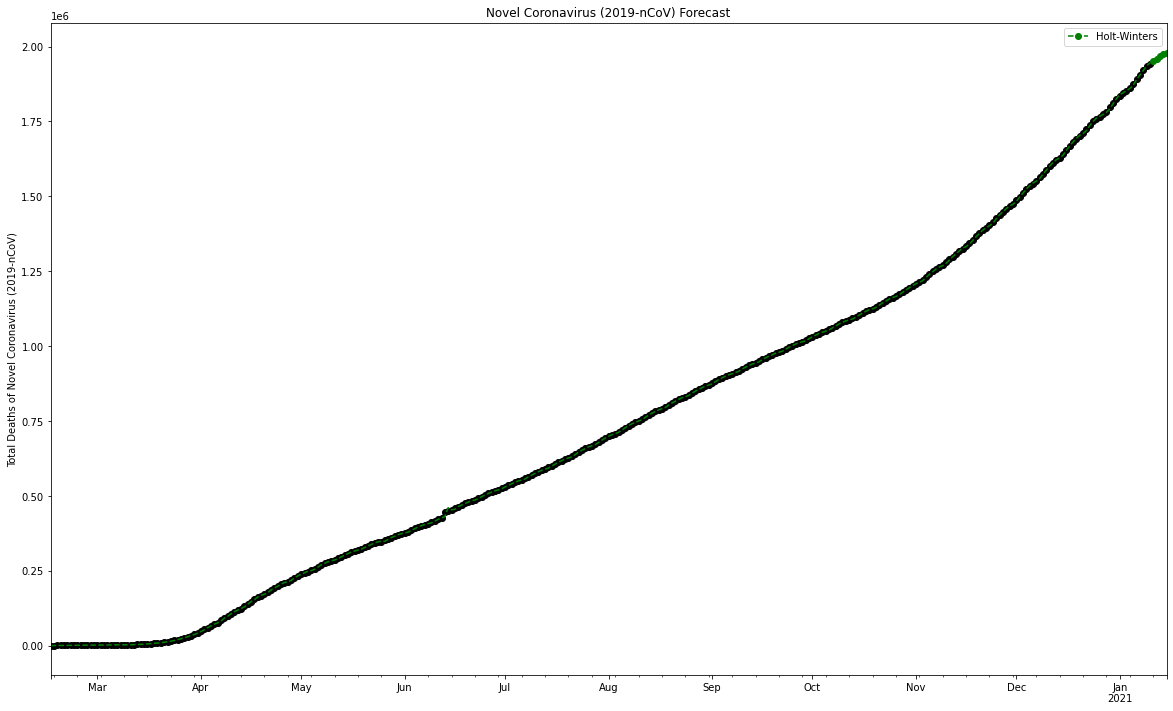

In [5]:
fit1 = ExponentialSmoothing(covDeaths, seasonal_periods = 2, trend='additive', damped = True).fit(use_boxcox=True, 
                                                                                                 damping_slope = .92)
ax = covDeaths.plot(figsize=(20,12), marker='o', color='black', title="Novel Coronavirus (2019-nCoV) Forecast")
ax.set_ylabel("Total Deaths of Novel Coronavirus (2019-nCoV)")
fit1.fittedvalues.plot(ax=ax, style='--', color='green')
fit1.forecast(5).rename('Holt-Winters').plot(ax=ax, style='--', marker='o', color='green', legend=True)
plt.show()

In [6]:
result1 = pd.DataFrame(index = [r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$", r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
result1["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
result1

KeyError: 'smoothing_slope'

In [ ]:
df = pd.DataFrame(np.c_[covDeaths, fit1.level, fit1.slope, fit1.season, fit1.fittedvalues],
columns = [r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'], index = covDeaths.index)
df.append(fit1.forecast(5).rename(r'$\hat{y}_t$').to_frame(), sort = True)

In [ ]:
fit2 = ExponentialSmoothing(covCases,trend='additive', damped = True, seasonal_periods = 2, ).fit(use_boxcox=True,
                                                                                                  damping_slope = .92)
ax = covCases.plot(figsize=(20,12), marker='o', color='black', title="Novel Coronavirus (2019-nCoV) Forecast" )
ax.set_ylabel("Total Cases of Novel Coronavirus (2019-nCoV)")
fit2.fittedvalues.plot(ax=ax, style='--', color='green')
fit2.forecast(5).rename('Holt-Winters').plot(ax=ax, style='--', marker='o', color='green', legend=True)
plt.show()

In [ ]:
result2 = pd.DataFrame(index = [r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope',
          'smoothing_seasonal', 'initial_level', 'initial_slope']
result2["Additive"] = [fit2.params[p] for p in params] + [fit2.sse]
result2

In [ ]:
df = pd.DataFrame(np.c_[covCases, fit2.level, fit2.slope, fit2.season, fit2.fittedvalues],
columns = [r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'], index = covCases.index)
df.append(fit2.forecast(5).rename(r'$\hat{y}_t$').to_frame(), sort = True)

In [ ]:
fit3 = ExponentialSmoothing(covUSACases, seasonal_periods = 2, trend='additive', damped = True).fit(use_boxcox=True, 
                                                                                                 damping_slope = 1)
ax = covUSACases.plot(figsize=(20,12), marker='o', color='black', title="Novel Coronavirus (2019-nCoV) Forecast")
ax.set_ylabel("Total Cases USA of Novel Coronavirus (2019-nCoV)")
fit3.fittedvalues.plot(ax=ax, style='--', color='green')
fit3.forecast(5).rename('Holt-Winters').plot(ax=ax, style='--', marker='o', color='green', legend=True)
plt.show()

In [ ]:
result3 = pd.DataFrame(index = [r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$", r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
result3["Additive"] = [fit3.params[p] for p in params] + [fit3.sse]
result3

In [ ]:
df3 = pd.DataFrame(np.c_[covUSACases, fit3.level, fit3.slope, fit3.season, fit3.fittedvalues],
columns = [r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'], index = covUSACases.index)
df3.append(fit3.forecast(5).rename(r'$\hat{y}_t$').to_frame(), sort = True)

In [ ]:
fit4 = ExponentialSmoothing(covUSADeaths, seasonal_periods = 2, trend='additive', damped = True).fit(use_boxcox=True, 
                                                                                                 damping_slope = .92)
ax = covUSADeaths.plot(figsize=(20,12), marker='o', color='black', title="Novel Coronavirus (2019-nCoV) Forecast")
ax.set_ylabel("Total Deaths USA of Novel Coronavirus (2019-nCoV)")
fit4.fittedvalues.plot(ax=ax, style='--', color='green')
fit4.forecast(5).rename('Holt-Winters').plot(ax=ax, style='--', marker='o', color='green', legend=True)
plt.show()

In [ ]:
result4 = pd.DataFrame(index = [r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$", r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
result4["Additive"] = [fit4.params[p] for p in params] + [fit4.sse]
result4

In [ ]:
df4 = pd.DataFrame(np.c_[covUSADeaths, fit4.level, fit4.slope, fit4.season, fit4.fittedvalues],
columns = [r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'], index = covUSADeaths.index)
df4.append(fit4.forecast(5).rename(r'$\hat{y}_t$').to_frame(), sort = True)